In [301]:
import warnings
warnings.filterwarnings('ignore')

In [302]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

import umap

import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

import sklearn.metrics as metrics

## Dataset setup

In [303]:
df = pd.read_csv("./data/Iris.csv", index_col=0)
df["Species"] = LabelEncoder().fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0


In [304]:
X = StandardScaler().fit_transform(df.drop("Species", axis=1))
y = df["Species"]

## Projection

In [305]:
X_tsne = TSNE(n_components=2, random_state=42).fit_transform(X)
X_umap = umap.UMAP(n_components=2, random_state=42).fit_transform(X)

def project_tsne_umap(y):
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap="viridis")
    plt.title("t-SNE projection of Iris dataset")

    plt.subplot(1, 2, 2)
    plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap="viridis")
    plt.title("UMAP projection of Iris dataset")
    plt.show()

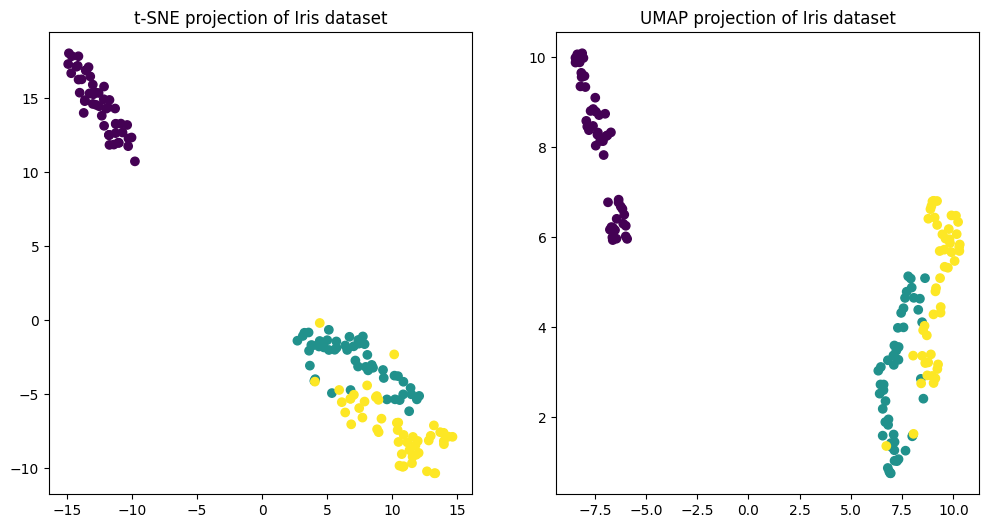

In [306]:
project_tsne_umap(y)

## Clust

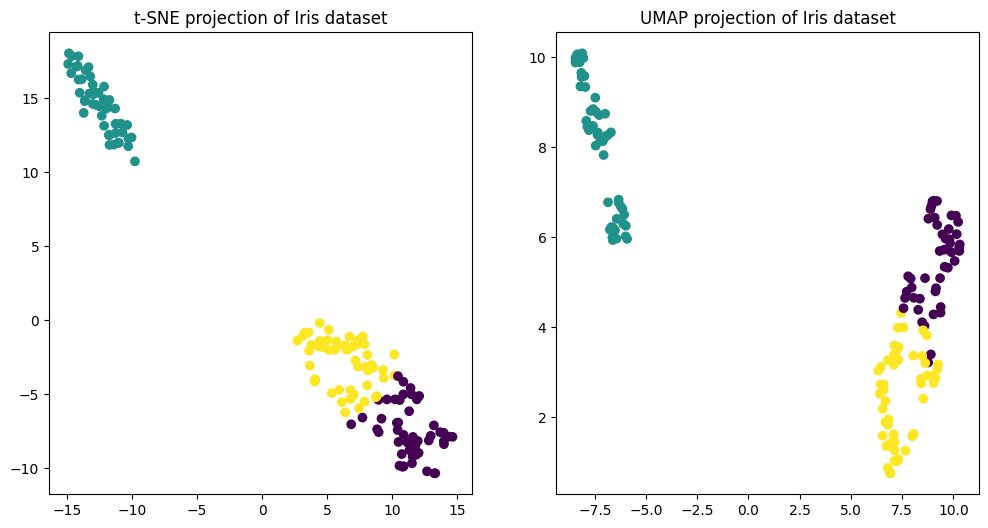

In [307]:
y_kmeans = KMeans(n_clusters=3, random_state=42).fit_predict(X)
project_tsne_umap(y_kmeans)

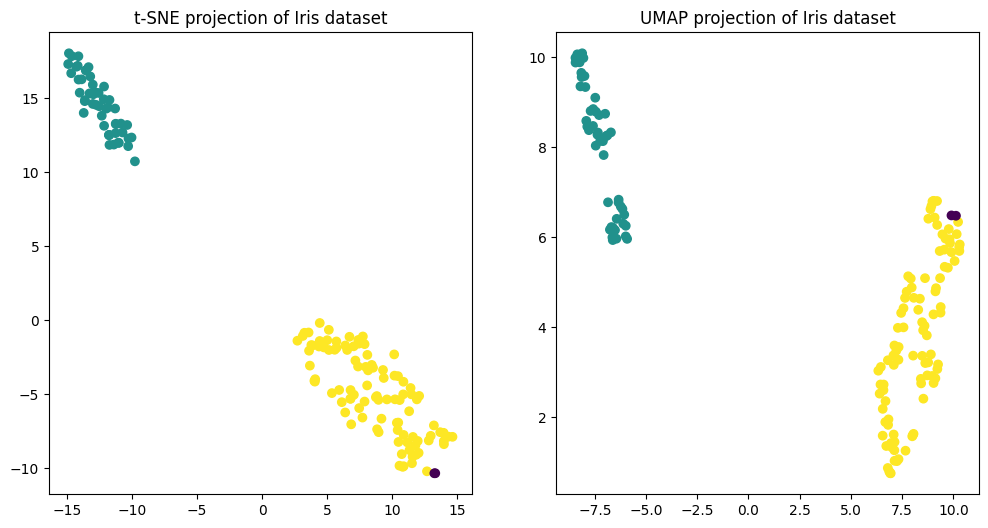

In [308]:
y_dbscan = DBSCAN(eps=1.65, min_samples=30).fit_predict(X)
project_tsne_umap(y_dbscan)

## Metrics

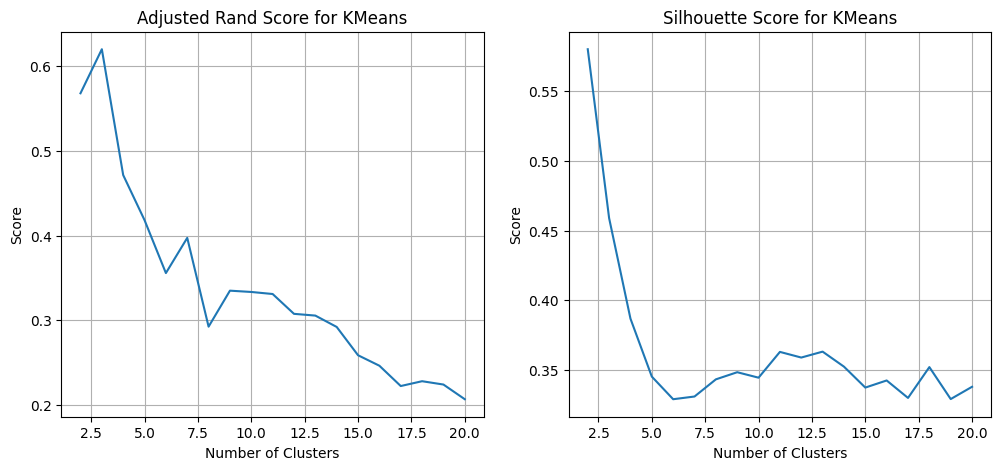

In [309]:
clusters_range = range(2, 21)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(clusters_range, [metrics.adjusted_rand_score(y, KMeans(n_clusters=i, random_state=42).fit_predict(X)) for i in clusters_range])
ax1.set_title("Adjusted Rand Score for KMeans")
ax1.set_xlabel("Number of Clusters")
ax1.set_ylabel("Score")
ax1.grid()

ax2.plot(clusters_range, [metrics.silhouette_score(X, KMeans(n_clusters=i, random_state=42).fit_predict(X)) for i in clusters_range])
ax2.set_title("Silhouette Score for KMeans")
ax2.set_xlabel("Number of Clusters")
ax2.set_ylabel("Score")
ax2.grid()

plt.show()

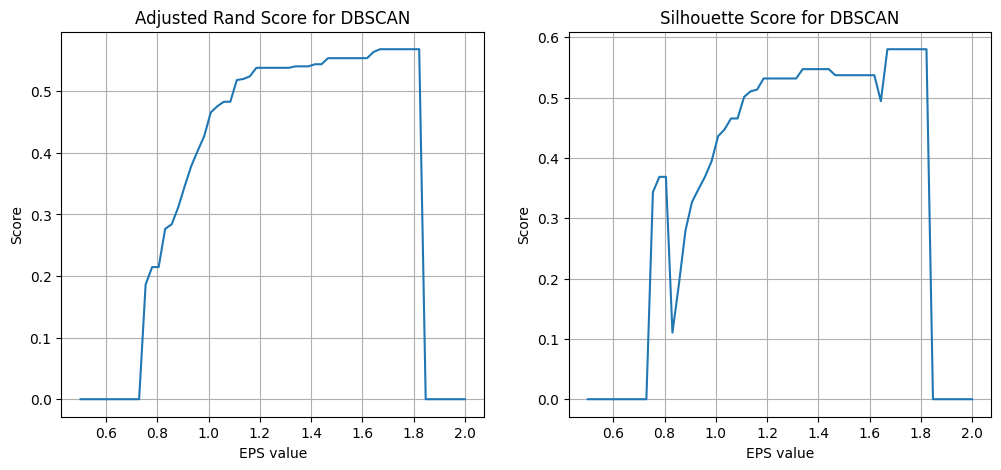

In [310]:
eps_range = np.linspace(0.5, 2, 60)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.plot(eps_range, [metrics.adjusted_rand_score(y, DBSCAN(eps=eps, min_samples=30).fit_predict(X)) for eps in eps_range])
ax1.set_title("Adjusted Rand Score for DBSCAN")
ax1.set_xlabel("EPS value")
ax1.set_ylabel("Score")
ax1.grid()

ax2.plot(eps_range, [metrics.silhouette_score(X, res) if 2 <= len(np.unique(res := DBSCAN(eps=eps, min_samples=30).fit_predict(X))) < len(X) else 0 for eps in eps_range])
ax2.set_title("Silhouette Score for DBSCAN")
ax2.set_xlabel("EPS value")
ax2.set_ylabel("Score")
ax2.grid()

plt.show()

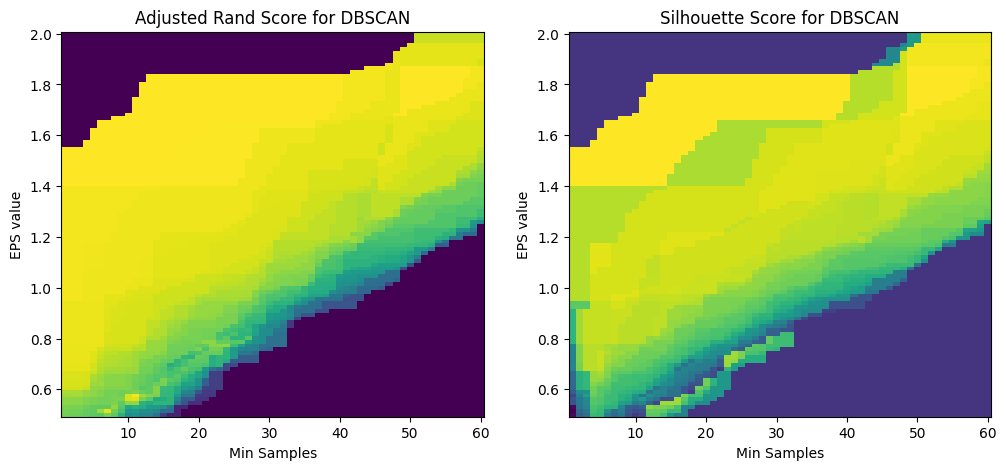

In [314]:
eps_range = np.linspace(0.5, 2, 100)
min_samples_range = range(1, 61)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

ax1.pcolormesh(min_samples_range, eps_range, [[metrics.adjusted_rand_score(y, DBSCAN(eps=eps, min_samples=s).fit_predict(X)) for s in min_samples_range] for eps in eps_range], shading="auto", cmap="viridis")
ax1.set_title("Adjusted Rand Score for DBSCAN")
ax1.set_xlabel("Min Samples")
ax1.set_ylabel("EPS value")

ax2.pcolormesh(min_samples_range, eps_range, [[metrics.silhouette_score(X, res) if 2 <= len(np.unique(res := DBSCAN(eps=eps, min_samples=s).fit_predict(X))) < len(X) else 0 for s in min_samples_range] for eps in eps_range], shading="auto", cmap="viridis")
ax2.set_title("Silhouette Score for DBSCAN")
ax2.set_xlabel("Min Samples")
ax2.set_ylabel("EPS value")

plt.show()